In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from datasets import get_mnist_loaders,get_cifar_loaders
from models import SimpleCNN, CNNWithResidual,FullyConnectedModel,CIFARCNN,CIFARResidualCNN
from trainer import train_model
from utils import plot_training_history, count_parameters,compare_models,plot_gradient_flow,plot_confusion_matrix
import time
import matplotlib.pyplot as plt
from trainer import train_model

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

train_loader, test_loader = get_mnist_loaders(batch_size=64)

config = {
    "input_size": 784,
    "num_classes": 10,
    "layers": [
        {"type": "linear", "size": 512},
        {"type": "relu"},
        {"type": "linear", "size": 256},
        {"type": "relu"},
        {"type": "linear", "size": 128},
        {"type": "sigmoid"}]}

simple_cnn = SimpleCNN(input_channels=1, num_classes=10).to(device)
residual_cnn = CNNWithResidual(input_channels=1, num_classes=10).to(device)
Fully_con = FullyConnectedModel(**config).to(device)

print(f"Simple CNN parameters: {count_parameters(simple_cnn)}")
print(f"Residual CNN parameters: {count_parameters(residual_cnn)}")
print(f"FUlly CON.parameters: {count_parameters(Fully_con)}")

print("Training FUlly CON...")
fully_con_history = train_model(Fully_con, train_loader, test_loader, epochs=5, device=str(device))

print("Training Simple CNN...")
simple_history = train_model(simple_cnn, train_loader, test_loader, epochs=5, device=str(device))

print("Training Residual CNN...")
residual_history = train_model(residual_cnn, train_loader, test_loader, epochs=5, device=str(device))

plot_training_history(fully_con_history)
plot_training_history(simple_history)
plot_training_history(residual_history)



Simple CNN parameters: 620362
Residual CNN parameters: 160906
FUlly CON.parameters: 1738890
Training Cifar CNN res...


100%|██████████| 157/157 [00:02<00:00, 64.66it/s]


Epoch 1/5:
Train Loss: 1.2641, Train Acc: 0.5417
Test Loss: 0.9899, Test Acc: 0.6461
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 63.68it/s]


Epoch 2/5:
Train Loss: 0.8294, Train Acc: 0.7067
Test Loss: 0.9780, Test Acc: 0.6645
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 63.86it/s]


Epoch 3/5:
Train Loss: 0.6490, Train Acc: 0.7724
Test Loss: 0.7549, Test Acc: 0.7463
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 60.84it/s]


Epoch 4/5:
Train Loss: 0.5342, Train Acc: 0.8135
Test Loss: 0.6097, Test Acc: 0.7945
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 62.03it/s]


Epoch 5/5:
Train Loss: 0.4546, Train Acc: 0.8426
Test Loss: 0.6137, Test Acc: 0.7844
--------------------------------------------------
111.12743282318115
Training FUlly CON...


100%|██████████| 157/157 [00:02<00:00, 77.89it/s]


Epoch 1/5:
Train Loss: 1.6724, Train Acc: 0.4037
Test Loss: 1.5287, Test Acc: 0.4568
--------------------------------------------------


100%|██████████| 157/157 [00:01<00:00, 79.41it/s]


Epoch 2/5:
Train Loss: 1.4728, Train Acc: 0.4788
Test Loss: 1.4559, Test Acc: 0.4864
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 76.10it/s]


Epoch 3/5:
Train Loss: 1.3825, Train Acc: 0.5131
Test Loss: 1.4275, Test Acc: 0.4958
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 72.35it/s]


Epoch 4/5:
Train Loss: 1.3178, Train Acc: 0.5341
Test Loss: 1.4115, Test Acc: 0.5041
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 76.80it/s]


Epoch 5/5:
Train Loss: 1.2754, Train Acc: 0.5494
Test Loss: 1.3972, Test Acc: 0.5084
--------------------------------------------------
73.79678559303284
Training Cifar CNN...


100%|██████████| 157/157 [00:02<00:00, 72.96it/s]


Epoch 1/5:
Train Loss: 1.3671, Train Acc: 0.5066
Test Loss: 1.1257, Test Acc: 0.6021
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 74.79it/s]


Epoch 2/5:
Train Loss: 0.9460, Train Acc: 0.6673
Test Loss: 0.8732, Test Acc: 0.6887
--------------------------------------------------


100%|██████████| 157/157 [00:01<00:00, 78.86it/s]


Epoch 3/5:
Train Loss: 0.7690, Train Acc: 0.7314
Test Loss: 0.7839, Test Acc: 0.7278
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 72.40it/s]


Epoch 4/5:
Train Loss: 0.6597, Train Acc: 0.7679
Test Loss: 0.7694, Test Acc: 0.7378
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 78.08it/s]


Epoch 5/5:
Train Loss: 0.5694, Train Acc: 0.7994
Test Loss: 0.7605, Test Acc: 0.7437
--------------------------------------------------
80.28903198242188


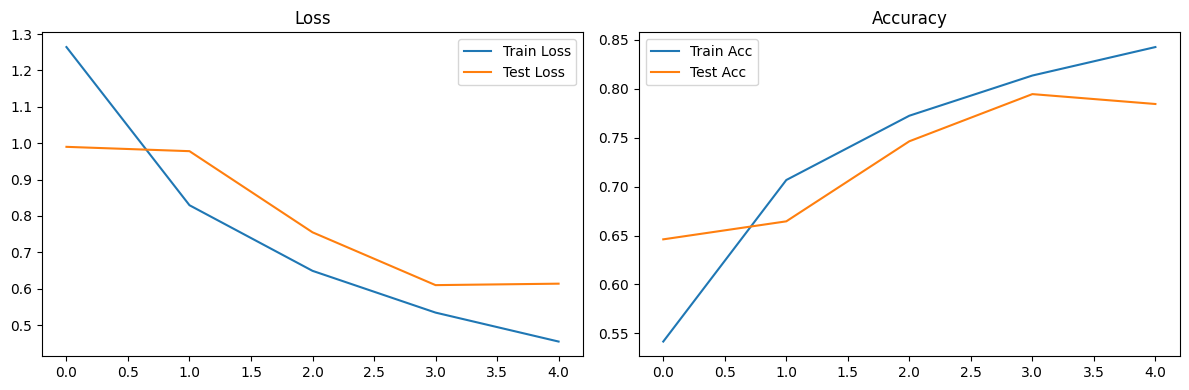

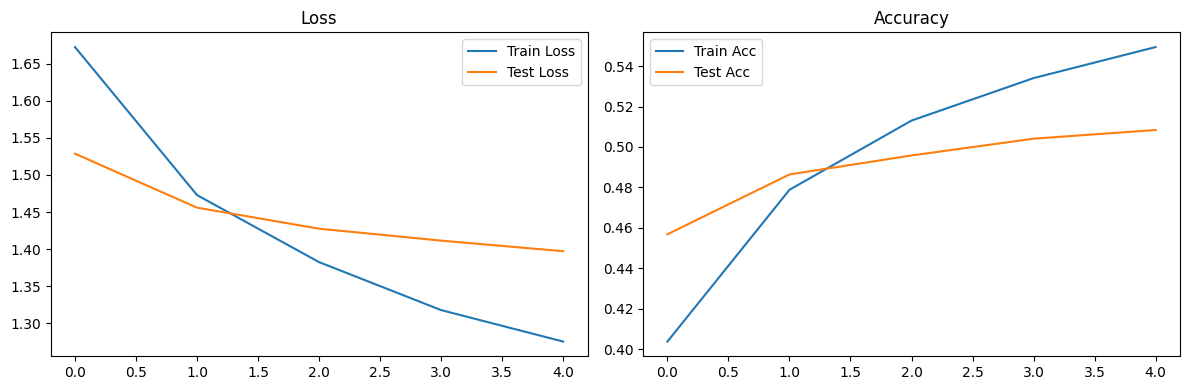

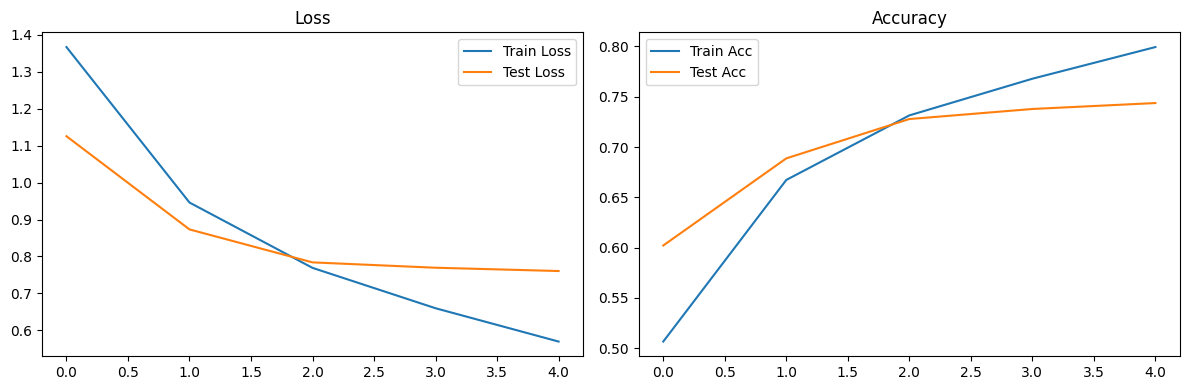

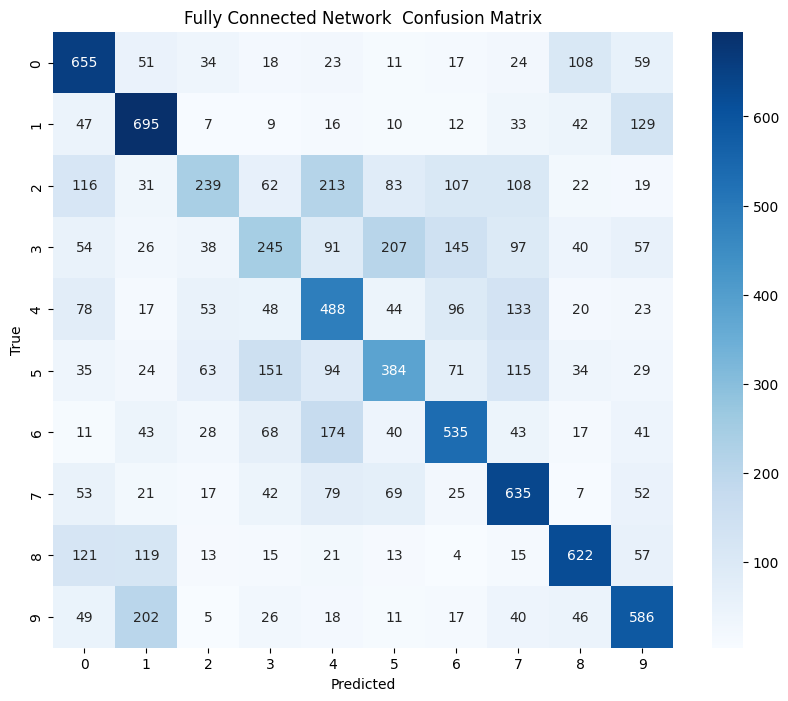

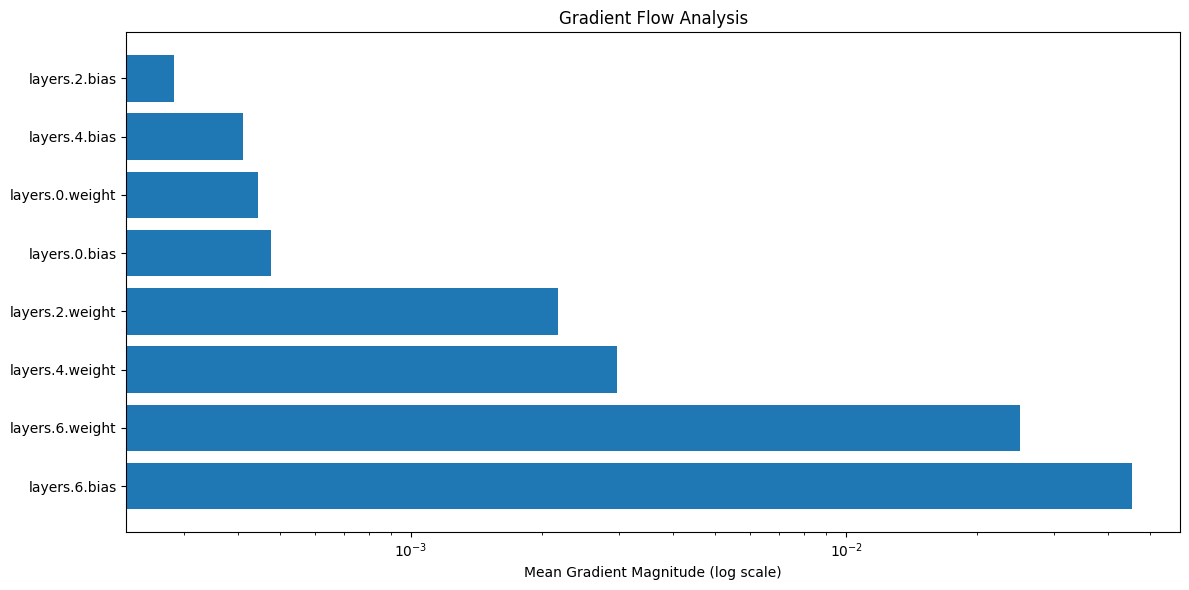

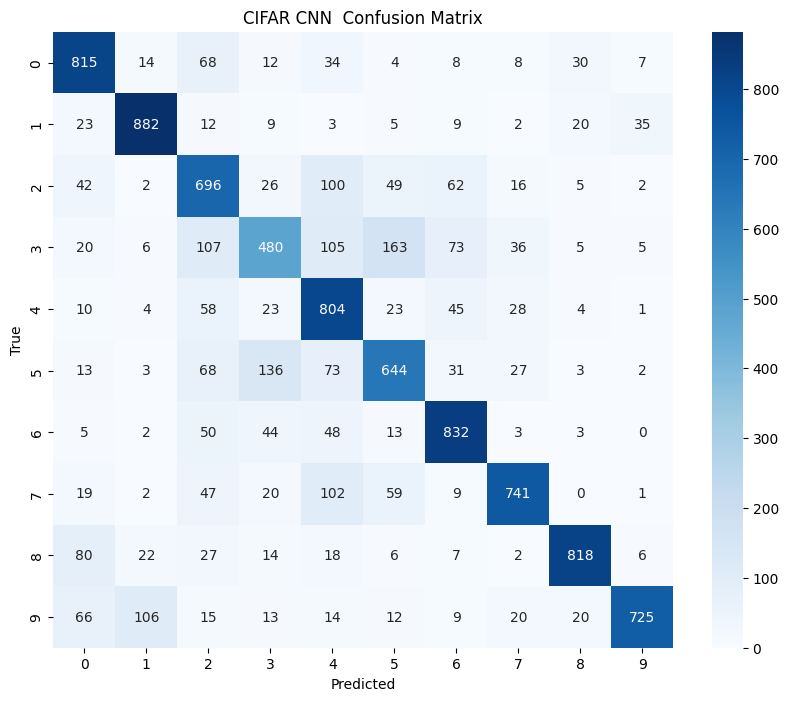

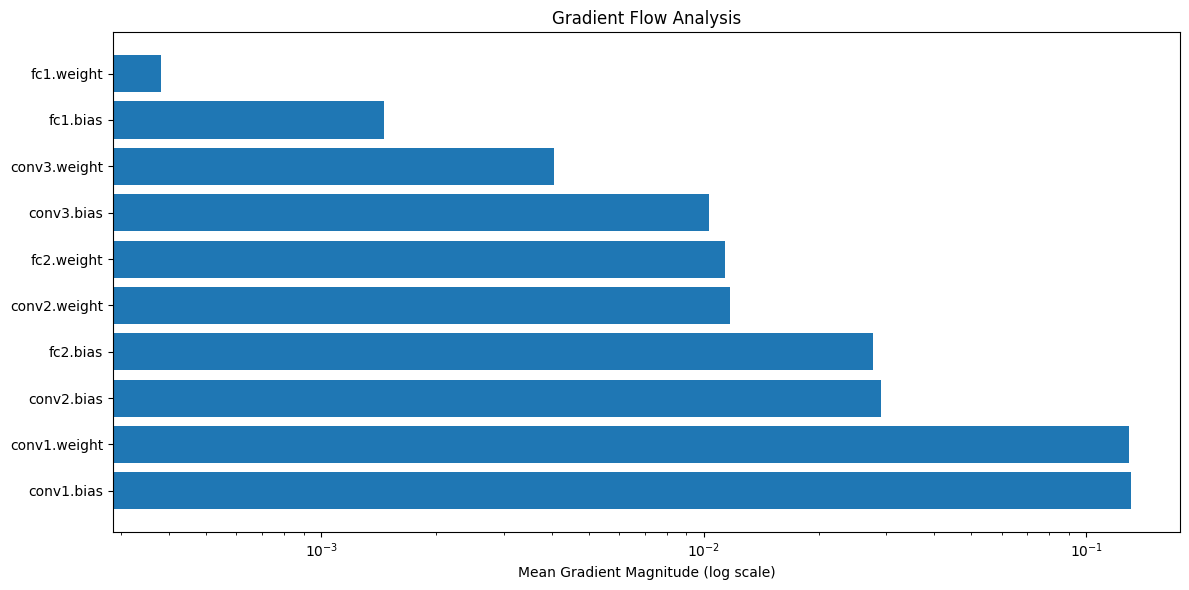

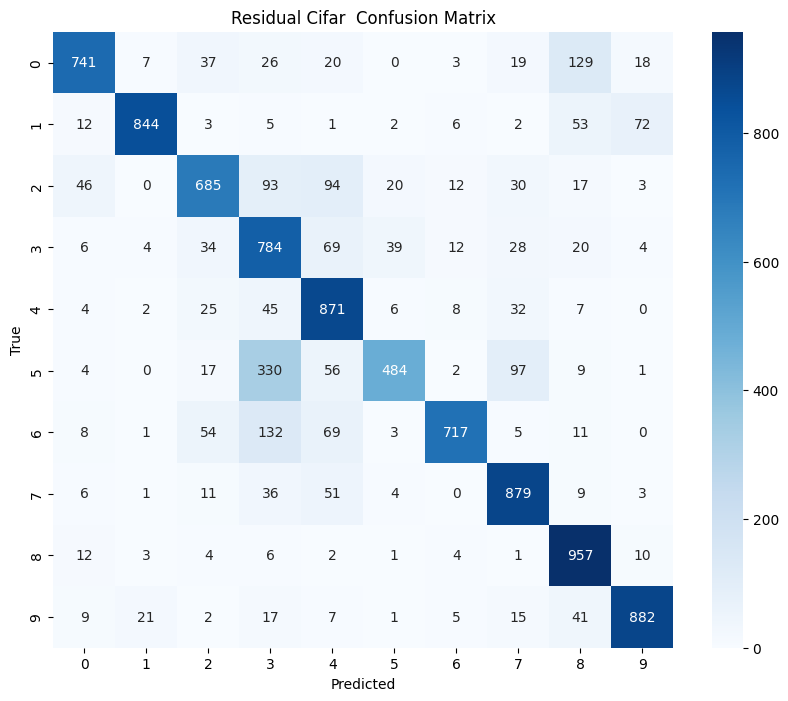

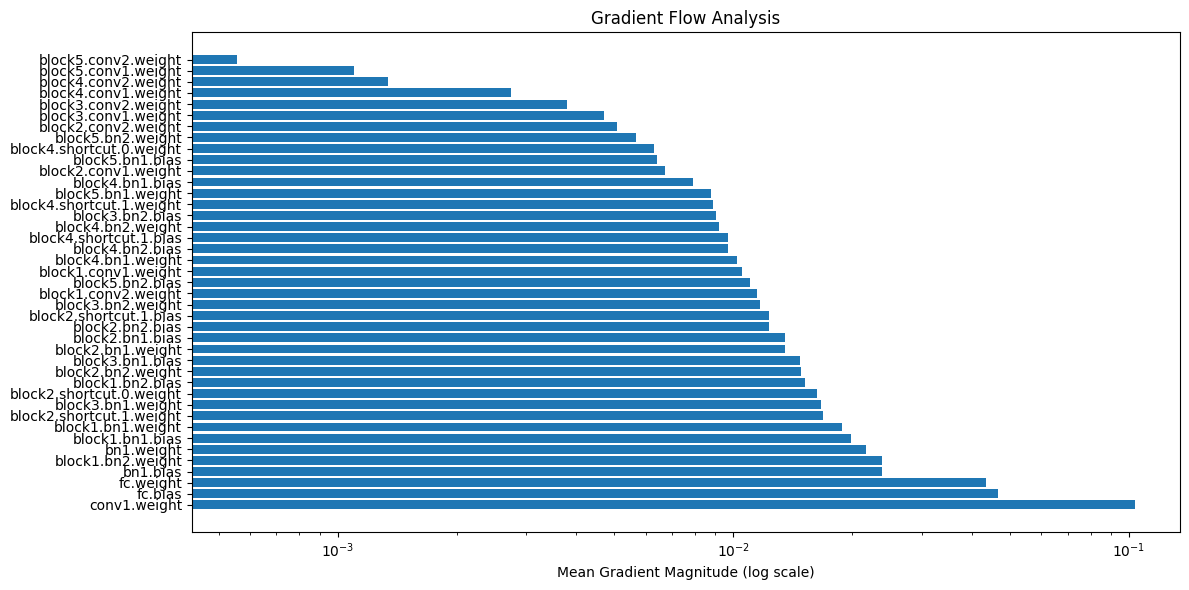

In [3]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_loader, test_loader = get_cifar_loaders(batch_size=64)

config = {
    "input_size": 3072,
    "num_classes": 10,
    "layers": [
        {"type": "linear", "size": 512},
        {"type": "relu"},
        {"type": "linear", "size": 256},
        {"type": "relu"},
        {"type": "linear", "size": 128},
        {"type": "sigmoid"}]}


cifar_cnn = CIFARCNN( num_classes=10).to(device)
residual_cnn = CNNWithResidual(input_channels=1, num_classes=10).to(device)
Fully_con = FullyConnectedModel(**config).to(device)
cifar_res = CIFARResidualCNN(num_classes=10).to(device)

print(f"Simple CNN parameters: {count_parameters(cifar_cnn)}")
print(f"Residual CNN parameters: {count_parameters(residual_cnn)}")
print(f"FUlly CON.parameters: {count_parameters(Fully_con)}")

print("Training Cifar CNN res...")
cifar_res_history= train_model(cifar_res, train_loader, test_loader, epochs=5, device=str(device))

print("Training FUlly CON...")
fully_con_history = train_model(Fully_con, train_loader, test_loader, epochs=5, device=str(device))

print("Training Cifar CNN...")
cifar_history = train_model(cifar_cnn, train_loader, test_loader, epochs=5, device=str(device))


plot_training_history(cifar_res_history)
plot_training_history(fully_con_history)
plot_training_history(cifar_history)
models_to_analyze = {
    "Fully Connected Network": Fully_con,
    "CIFAR CNN": cifar_cnn,
    "Residual Cifar": cifar_res
}

for model_name, model in models_to_analyze.items():
    plot_confusion_matrix(model,test_loader, device, f'{model_name}  Confusion Matrix')
    plot_gradient_flow(model)

